In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
alldata = pd.read_csv('../data/medications.csv')

In [4]:
alldata['COVERAGE_RATIO'] = (alldata['PAYER_COVERAGE']/ alldata['BASE_COST'])

# alldata.head(10)
alldata['START'] = pd.to_datetime(alldata['START'])

In [ ]:
alldata.head()

In [36]:
# Define cost bins and labels
bins = [250, 500, 700, 900, 1000, 5000, 10000, float("inf")]
labels = ["<$250", "250-500", "500-700", "700-900", "900-1000", "5000-10000", ">10000"]

# Create a new column for cost slabs
alldata["Cost_Slab"] = pd.cut(alldata["BASE_COST"], bins=bins, labels=labels, right=False)

mean_cover = alldata.groupby("Cost_Slab")["COVERAGE_RATIO"].mean().reset_index()

alldata['Cost_Slab'].value_counts()


C:\Users\aditi\AppData\Local\Temp\ipykernel_9908\836009617.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_cover = alldata.groupby("Cost_Slab")["COVERAGE_RATIO"].mean().reset_index()


Cost_Slab
<$250         20812
250-500        5976
700-900        5785
500-700        4062
900-1000       3331
>10000           86
5000-10000       57
Name: count, dtype: int64

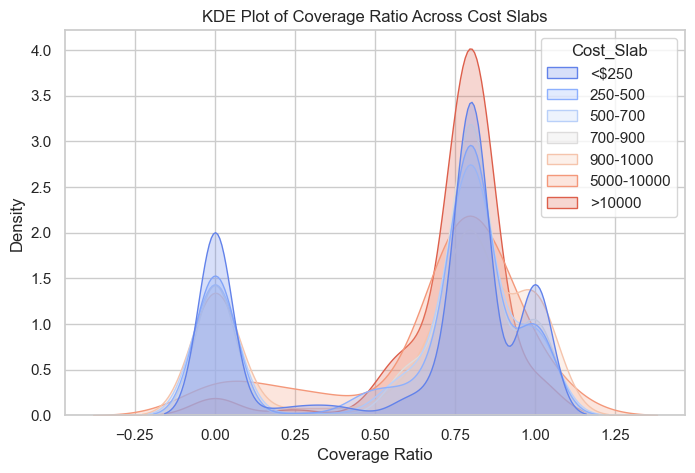

In [39]:
#KDE for med cost vs coverage ratio
plt.figure(figsize=(8, 5))
sns.kdeplot(data=alldata, x="COVERAGE_RATIO", hue="Cost_Slab", common_norm=False, fill=True, palette="coolwarm")
plt.xlabel("Coverage Ratio")
plt.ylabel("Density")
plt.title("KDE Plot of Coverage Ratio Across Cost Slabs")
plt.savefig('../plots/medCostKDE.png')
plt.show()



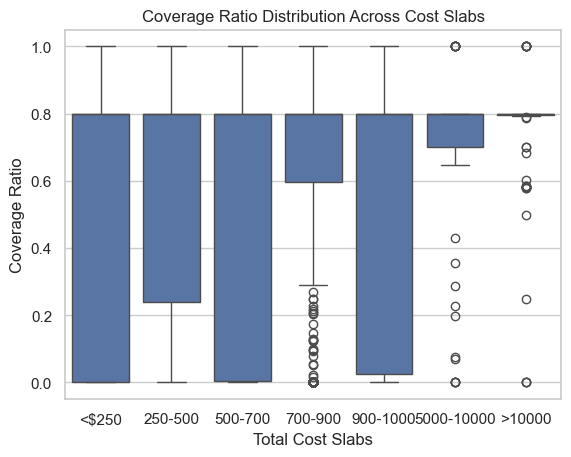

In [38]:
plt.figure()
sns.boxplot(x="Cost_Slab", y = "COVERAGE_RATIO", data = alldata)

plt.xlabel("Total Cost Slabs")
plt.ylabel("Coverage Ratio")
plt.title("Coverage Ratio Distribution Across Cost Slabs")

# Show plot
plt.show()